In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("GFMdataset2.csv")

In [3]:
df.dropna(inplace=True)

In [4]:
# Replace infinity values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [5]:
# Drop rows with NaN values again
df.dropna(inplace=True)

In [6]:
df = df[~(df['Length_of_Fundraising'] == '0    0\n1    0\ndtype: int64')]

In [7]:
# Convert the column to float data type
df['Length_of_Fundraising'] = df['Length_of_Fundraising'].astype(float)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [9]:
df.head(1)

,Url,Category,Position,Title,Amount_Raised,Goal,Number_of_Donators,Length_of_Fundraising,FB_Shares,GFM_hearts,...,Text_Length,Perc_long_words,Misspelled_words,City,Country,Words,Sentences,Similarities,Mean Similarity,TextVolume
0,https://www.gofundme.com/3ctqm-medical-bills-f...,Medical,0.0,92 yr old man brutal attack,327345.0,15000.0,12167.0,30.0,26000.0,12000.0,...,79,18.987342,27,LOS ANGELES,CA,"['rodolfo', 'rodriguez', 'need', 'your', 'help...",['rodolfo rodriguez need your help today 92 yr...,[0.5530566 0.3759508 0.27966958 0.99999994 0...,0.495305,4


In [25]:
# Select the columns for correlation analysis
selected_columns = ['Goal', 'Number_of_Donators', 'Length_of_Fundraising', 'FB_Shares', 'GFM_hearts', 'Title_Length',
            'Text_Length', 'Perc_long_words', 'Misspelled_words', 'Mean Similarity', 'TextVolume', 'Amount_Raised']

In [26]:
# Subset the DataFrame to include only the selected columns
selected_df = df[selected_columns]

# Calculate the correlation matrix of the selected columns
correlation_matrix = selected_df.corr()

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0, 0.5, 'Goal'),
  Text(0, 1.5, 'Number_of_Donators'),
  Text(0, 2.5, 'Length_of_Fundraising'),
  Text(0, 3.5, 'FB_Shares'),
  Text(0, 4.5, 'GFM_hearts'),
  Text(0, 5.5, 'Title_Length'),
  Text(0, 6.5, 'Text_Length'),
  Text(0, 7.5, 'Perc_long_words'),
  Text(0, 8.5, 'Misspelled_words'),
  Text(0, 9.5, 'Mean Similarity'),
  Text(0, 10.5, 'TextVolume'),
  Text(0, 11.5, 'Amount_Raised')])

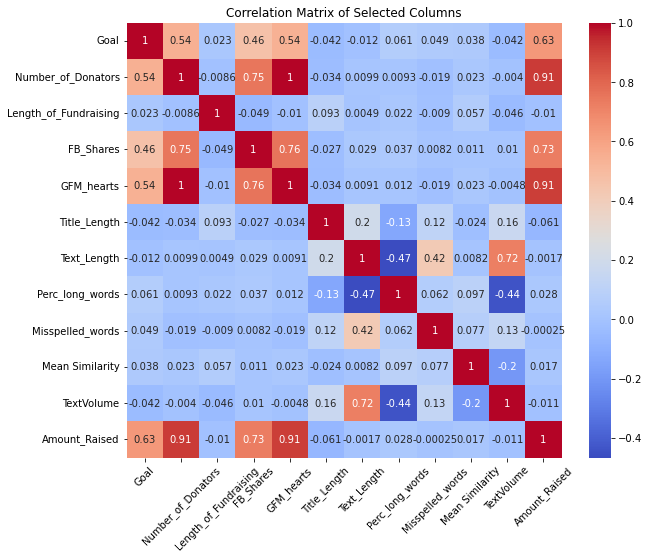

In [27]:
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)

# Customize the plot
plt.title('Correlation Matrix of Selected Columns')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

In [10]:
# Select the relevant features and the target variable
features = [ 'Goal', 'Number_of_Donators', 'Length_of_Fundraising', 'FB_Shares', 'GFM_hearts', 'Title_Length',
            'Text_Length', 'Perc_long_words', 'Misspelled_words', 'Mean Similarity', 'TextVolume']
target = 'Amount_Raised'

In [11]:
# Create a linear regression model
model = LinearRegression()

In [12]:
# Train the model using all the data
model.fit(df[features], df[target])

LinearRegression()

In [13]:
# Make predictions on the entire dataset
y_pred = model.predict(df[features])

In [14]:
# Evaluate the model
mse = mean_squared_error(df[target], y_pred)
mae = mean_absolute_error(df[target], y_pred)
r2 = r2_score(df[target], y_pred)

In [15]:
# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


Mean Squared Error: 2381370079.973255
Mean Absolute Error: 20968.824406969903
R-squared: 0.8703093369487989


In [16]:
# Analyze the feature coefficients
coefficients = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
print(coefficients)

                  Feature   Coefficient
0                    Goal      0.110895
1      Number_of_Donators    168.723574
2   Length_of_Fundraising     -4.926950
3               FB_Shares      3.008251
4              GFM_hearts   -118.844439
5            Title_Length  -2289.272790
6             Text_Length   -394.470785
7         Perc_long_words     51.634399
8        Misspelled_words    291.188025
9         Mean Similarity -13365.966125
10             TextVolume   4151.355950


# without text parameters

In [17]:
# Select the relevant features and the target variable
features = [ 'Length_of_Fundraising', 'Title_Length',
            'Text_Length', 'Perc_long_words', 'Misspelled_words', 'Mean Similarity', 'TextVolume']
target = 'Amount_Raised'

In [18]:
# Create a linear regression model
model = LinearRegression()

In [19]:
# Train the model using all the data
model.fit(df[features], df[target])

LinearRegression()

In [20]:
# Make predictions on the entire dataset
y_pred = model.predict(df[features])

In [21]:
# Evaluate the model
mse = mean_squared_error(df[target], y_pred)
mae = mean_absolute_error(df[target], y_pred)
r2 = r2_score(df[target], y_pred)

In [22]:
# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


Mean Squared Error: 18272068078.052853
Mean Absolute Error: 48288.88249277687
R-squared: 0.004893592857278528


In [23]:
# Analyze the feature coefficients
coefficients = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
print(coefficients)

                 Feature   Coefficient
0  Length_of_Fundraising    -18.247406
1           Title_Length  -5456.917758
2            Text_Length    659.111697
3        Perc_long_words    688.635849
4       Misspelled_words   -207.229228
5        Mean Similarity  22802.646922
6             TextVolume  -2844.833423
